In [21]:
import numpy as np 
import cv2
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive',force_remount= True)

Mounted at /content/drive


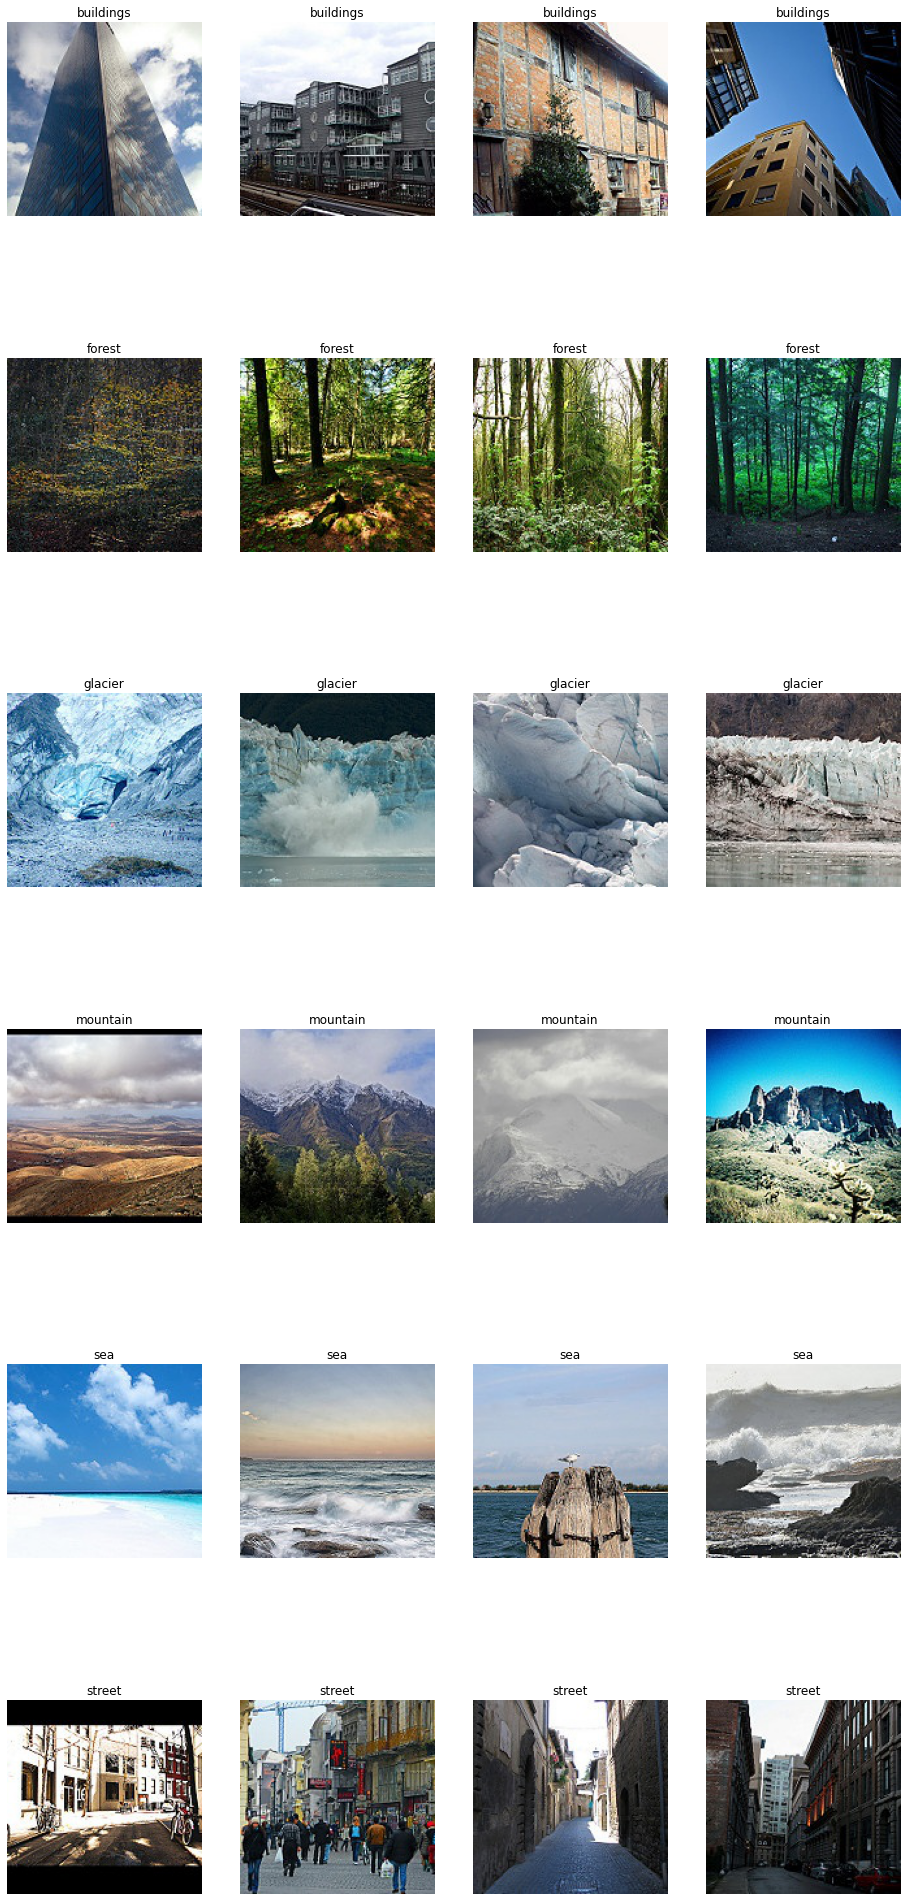

In [22]:
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
#Displaying theImages
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#We'll output images in a 6X4 configuration. 

nrows=6
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*6)

pic_index+=4

next_a_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[0]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[0]+'/')[pic_index-4:pic_index]]
next_b_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[1]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[1]+'/')[pic_index-4:pic_index]]
next_c_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[2]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[2]+'/')[pic_index-4:pic_index]]
next_d_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[3]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[3]+'/')[pic_index-4:pic_index]]
next_e_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[4]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[4]+'/')[pic_index-4:pic_index]]
next_f_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[5]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[5]+'/')[pic_index-4:pic_index]]

j=0
for i, img_path in enumerate(next_a_pix+next_b_pix+next_c_pix+next_d_pix+next_e_pix+next_f_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)

  if i%4==0 and i>=4:
    j=j+1
  sp.title.set_text(classes[j])

  
plt.show()

In [23]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.1)


train_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)


validation_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator(rescale = 1./255.)
test_generator=test_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_test/seg_test/',
      target_size=(150,150),
      batch_size=32,
      class_mode='sparse',
      seed=2209
)




Found 9225 images belonging to 6 classes.
Found 1022 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [24]:
SEED = 2209
import os
import random as rn
import numpy as np
import tensorflow as tf

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.compat.v1.set_random_seed(SEED)
rn.seed(SEED)

# **Convolutional Neural Network**

In [26]:
import tensorflow as tf
from keras import regularizers

model1=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.Conv2D(16,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    
  
    tf.keras.layers.Flatten(),
       
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(6,activation='softmax')
])

In [27]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model1.fit_generator(
  train_generator,
  epochs=50,
  validation_data=validation_generator,
  callbacks=[reduce],
  verbose=1
)

Epoch 1/50
145/145 [==============================] - 1363s 9s/step - loss: 1.7776 - accuracy: 0.3079 - val_loss: 4.2578 - val_accuracy: 0.2221
Epoch 2/50
145/145 [==============================] - 461s 3s/step - loss: 1.3401 - accuracy: 0.4603 - val_loss: 5.3143 - val_accuracy: 0.2221
Epoch 3/50
145/145 [==============================] - 464s 3s/step - loss: 1.1801 - accuracy: 0.5458 - val_loss: 1.8984 - val_accuracy: 0.4785
Epoch 4/50
145/145 [==============================] - 464s 3s/step - loss: 1.0735 - accuracy: 0.5995 - val_loss: 1.3986 - val_accuracy: 0.5215
Epoch 5/50
145/145 [==============================] - 467s 3s/step - loss: 0.9794 - accuracy: 0.6477 - val_loss: 1.1359 - val_accuracy: 0.6076
Epoch 6/50
145/145 [==============================] - 468s 3s/step - loss: 0.9194 - accuracy: 0.6895 - val_loss: 0.9407 - val_accuracy: 0.6751
Epoch 7/50
145/145 [==============================] - 475s 3s/step - loss: 0.8628 - accuracy: 0.7141 - val_loss: 1.0011 - val_accuracy: 0.565

In [28]:
accuracy=model1.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reduce],verbose=2)
print('Accuracy of the model on the test set: ',accuracy[1])

2/2 - 7s - loss: 0.2539 - accuracy: 0.9531
Accuracy of the model on the test set:  0.953125


In [8]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['acc']
val_acc=history1.history['val_acc']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

KeyError: ignored

# **DenseNet121**

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.densenet import DenseNet121
import keras


base_model1=DenseNet121(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model1.trainable = False

x = Dense(256, activation='relu')(base_model1.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model1 = Model(base_model1.input, x) 
transfer_model1.compile(optimizer =keras.optimizers.SGD(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history2 = transfer_model1.fit_generator(
            train_generator,
            steps_per_epoch=int(12632/64),
            epochs=50,
            validation_data=validation_generator,
            validation_steps=int(1402/64),
            callbacks=[reduce],
            verbose=1)

In [ ]:
accuracy1=transfer_model1.evaluate_generator(test_generator, steps=len(test_generator)//32,verbose=2)
print('Accuracy of the model on the test set: ',accuracy1[1])

In [ ]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

# **ResNet50**

In [ ]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.resnet50 import ResNet50
import keras


base_model2=ResNet50(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model2.trainable = False

x = Dense(512, activation='relu')(base_model2.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model2 = Model(base_model2.input, x) 
transfer_model2.compile(optimizer =keras.optimizers.SGD(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history3 = transfer_model2.fit_generator(
            train_generator,
            steps_per_epoch=int(12632/64),
            epochs=50,
            validation_data=validation_generator,
            validation_steps=int(1402/64),
            callbacks=[reduce],
            verbose=1)

In [ ]:
accuracy2=transfer_model2.evaluate_generator(test_generator, steps=len(test_generator)//32,verbose=2)
print('Accuracy of the model on the test set: ',accuracy2[1])

In [ ]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history3.history['acc']
val_acc=history3.history['val_acc']
loss=history3.history['loss']
val_loss=history3.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()